### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 500)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [2]:
df = pd.read_csv("breast_cancer.csv", encoding = "UTF-8")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Analysing Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.shape

(569, 32)

In [5]:
# Dropping Unnecessary columns
df.drop(["id"], inplace = True, axis = 1)

#### Univariate Analysis

In [6]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

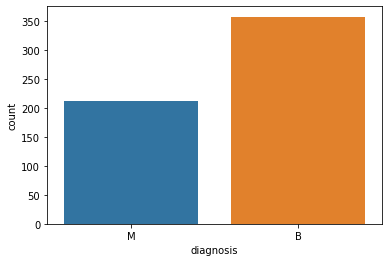

In [7]:
sns.countplot(x = "diagnosis", data = df)
plt.show()

In [8]:
# Reaplacing Categorical variabele to numerical variable

df["diagnosis"] = df["diagnosis"].replace(["M"],1)
df["diagnosis"] = df["diagnosis"].replace(["B"],0)

In [9]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Data Preprocessing
Splitting  dataset into train and test

In [10]:
y = df["diagnosis"]
X = df.drop("diagnosis", axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0)

Standardising Data

In [12]:
sc = StandardScaler()

In [13]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### Importing Keras Library For Training The Model

In [17]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

In [18]:
# Defining Function For Hyperparameter Tuning

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [19]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Breast Cancer Classification')

In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [21]:
tuner.search(X_train, y_train, epochs = 15, validation_data = (X_test, y_test))

Trial 5 Complete [00h 00m 11s]
val_mean_absolute_error: 0.20997927089532217

Best val_mean_absolute_error So Far: 0.1548772950967153
Total elapsed time: 00h 01m 20s
INFO:tensorflow:Oracle triggered exit


In [22]:
tuner.results_summary()

Results summary
Results in project\Breast Cancer Classification
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 128
learning_rate: 0.001
units_2: 288
units_3: 192
units_4: 416
units_5: 352
units_6: 352
units_7: 96
units_8: 224
units_9: 224
units_10: 96
units_11: 416
units_12: 224
units_13: 256
units_14: 288
units_15: 352
units_16: 64
units_17: 416
units_18: 192
units_19: 128
Score: 0.1548772950967153
Trial summary
Hyperparameters:
num_layers: 20
units_0: 64
units_1: 320
learning_rate: 0.001
units_2: 160
units_3: 480
units_4: 192
units_5: 352
units_6: 160
units_7: 352
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
units_19: 32
Score: 0.15679706633090973
Trial summary
Hyperparameters:
num_layers: 8
units_0: 384
units_1: 448
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
uni